In [1]:
import pandas as pd
import sys
sys.path.append("../")
import macrophages_analysis
from sklearn.preprocessing import LabelEncoder
import scikitplot as skplt
from sklearn.model_selection import train_test_split, cross_val_score, KFold

## Data import

In [2]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

nucleus_dataset_p4g4_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset.csv')
nucleus_dataset_smooth_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset.csv')
nucleus_dataset_tcps_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset.csv')
all_surfaces_206 = pd.concat([nucleus_dataset_p4g4_206, nucleus_dataset_smooth_206, nucleus_dataset_tcps_206])

nucleus_dataset_p4g4 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset_smooth = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset.csv')
nucleus_dataset_tcps = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset.csv')
all_surfaces_86 = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])

# 20x CD206 model on CD86 dataset. P4G4+TCPS+Smooth data

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8909830391138802
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8969974126075415
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8908138463291883


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

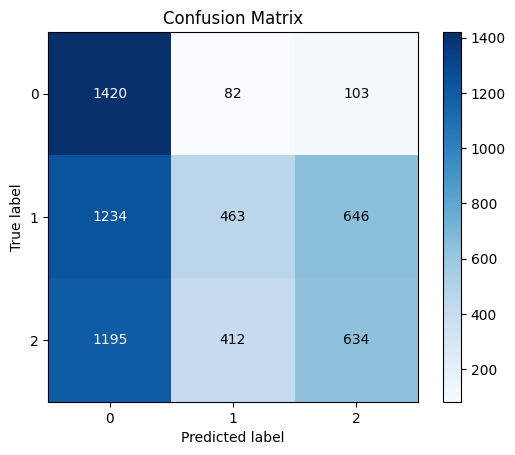

In [3]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(all_surfaces_206, confusion_matrix=False)

X_nucleus = all_surfaces_86.drop('CellType', axis=1)
y_nucleus = all_surfaces_86['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data = (X_nucleus, y_nucleus)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

--------
Mean accuracy of XGBClassifier (10-fold cross-validation) 0.7978839053784561
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.802619532147127
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.7937547149356964


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

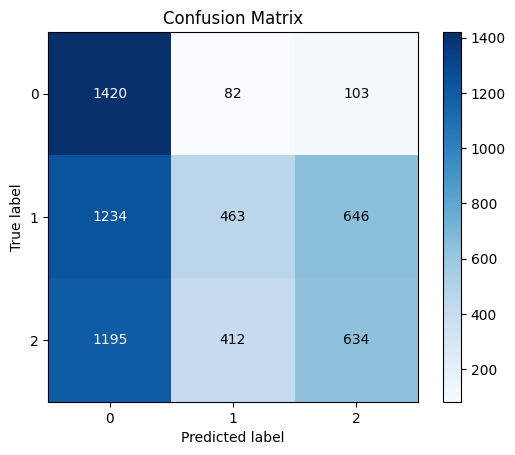

In [4]:
# Calculate accuracy and f1-macro scores using cross-validation
acc_scores = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='accuracy')
f1_macro = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='f1_macro')
f1_weighted = cross_val_score(pipe, X_nucleus, y_nucleus,scoring='f1_weighted')
print('--------')
print('Mean accuracy of XGBClassifier (10-fold cross-validation)', sum(acc_scores) / len(acc_scores))
print('Mean f1-macro of XGBClassifier (10-fold cross-validation)', sum(f1_macro) / len(f1_macro))
print('Mean f1_weighted of XGBClassifier (10-fold cross-validation)', sum(f1_weighted) / len(f1_weighted))
y_pred = pipe.predict(X_nucleus)
skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

AUC score for M1 0.7535195560339906
AUC score for M2 0.5693271734283798
AUC score for NT 0.6609558802586231
Average AUC 0.6612675365736644


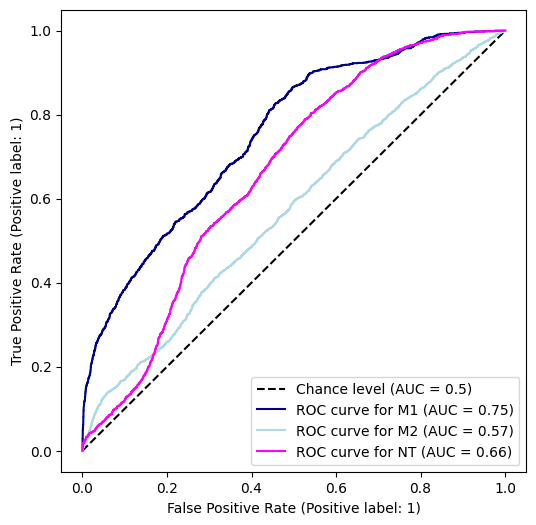

In [5]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

# 20x CD206 model on CD86 dataset. P4G4 data

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.9614646464646466
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.9665765166095529
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.9615546246787281


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

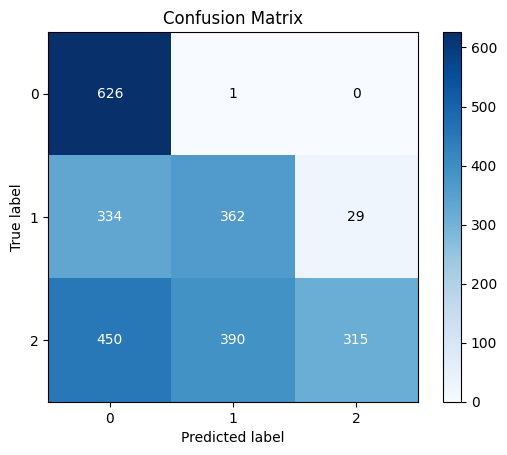

In [24]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_p4g4_206, confusion_matrix=False)

X_nucleus = nucleus_dataset_p4g4.drop('CellType', axis=1)
y_nucleus = nucleus_dataset_p4g4['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data = (X_nucleus, y_nucleus)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

In [25]:
acc_scores = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='accuracy')
f1_macro = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='f1_macro')
f1_weighted = cross_val_score(pipe, X_nucleus, y_nucleus,scoring='f1_weighted')
print('Mean accuracy of XGBClassifier (10-fold cross-validation)', sum(acc_scores) / len(acc_scores))
print('Mean f1-macro of XGBClassifier (10-fold cross-validation)', sum(f1_macro) / len(f1_macro))
print('Mean f1_weighted of XGBClassifier (10-fold cross-validation)', sum(f1_weighted) / len(f1_weighted))

--------
Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8100587669282948
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.7886440230873711
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.7893670107794147


AUC score for M1 0.8640185449116021
AUC score for M2 0.6547211579395487
AUC score for NT 0.828089218473834
Average AUC 0.7822763071083282


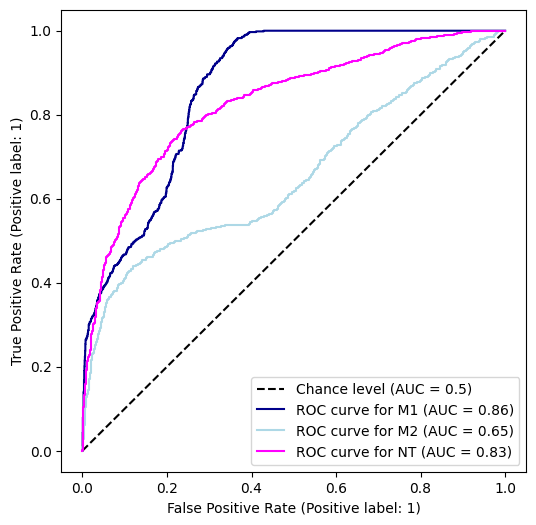

In [18]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

# 20x CD206 model on CD86 dataset. Smooth data

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8910344827586207
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.9036760090929132
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.89130318096338


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

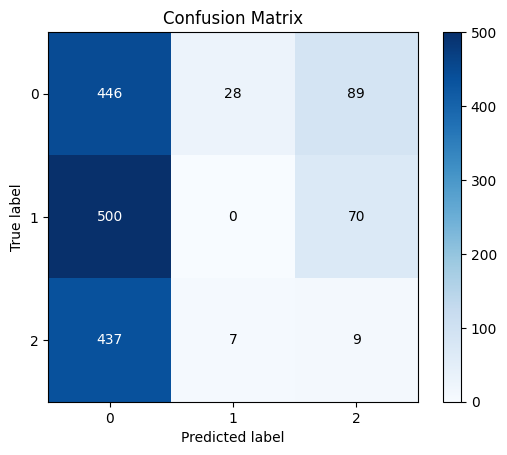

In [3]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_smooth_206, confusion_matrix=False)

X_nucleus = nucleus_dataset_smooth.drop('CellType', axis=1)
y_nucleus = nucleus_dataset_smooth['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data = (X_nucleus, y_nucleus)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

In [4]:
acc_scores = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='accuracy')
f1_macro = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='f1_macro')
f1_weighted = cross_val_score(pipe, X_nucleus, y_nucleus,scoring='f1_weighted')
print('Mean accuracy of XGBClassifier (10-fold cross-validation)', sum(acc_scores) / len(acc_scores))
print('Mean f1-macro of XGBClassifier (10-fold cross-validation)', sum(f1_macro) / len(f1_macro))
print('Mean f1_weighted of XGBClassifier (10-fold cross-validation)', sum(f1_weighted) / len(f1_weighted))

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8788921294367398
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8796422502768075
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8771030470606472


AUC score for M1 0.34668086931308156
AUC score for M2 0.22265851636966433
AUC score for NT 0.3233206494313676
Average AUC 0.2975533450380378


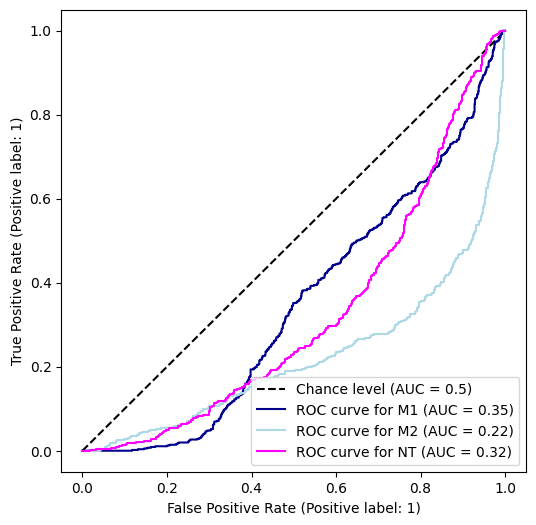

In [21]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

# 20x CD206 model on CD86 dataset. TCPS data

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.9173796791443849
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.9193303444723977
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.9178811017021031


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

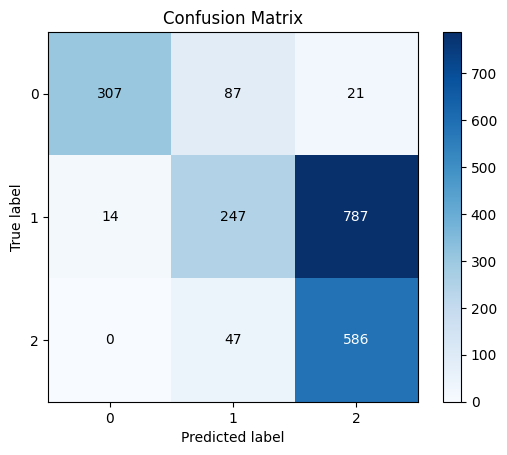

In [28]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_tcps_206, confusion_matrix=False)

X_nucleus = nucleus_dataset_tcps.drop('CellType', axis=1)
y_nucleus = nucleus_dataset_tcps['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data = (X_nucleus, y_nucleus)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

In [29]:
acc_scores = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='accuracy')
f1_macro = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='f1_macro')
f1_weighted = cross_val_score(pipe, X_nucleus, y_nucleus,scoring='f1_weighted')
print('Mean accuracy of XGBClassifier (10-fold cross-validation)', sum(acc_scores) / len(acc_scores))
print('Mean f1-macro of XGBClassifier (10-fold cross-validation)', sum(f1_macro) / len(f1_macro))
print('Mean f1_weighted of XGBClassifier (10-fold cross-validation)', sum(f1_weighted) / len(f1_weighted))

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.9250948971474031
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8983491489838962
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.9146091705941686


AUC score for M1 0.9662879955276191
AUC score for M2 0.5843910247071848
AUC score for NT 0.7236159118174584
Average AUC 0.7580983106840874


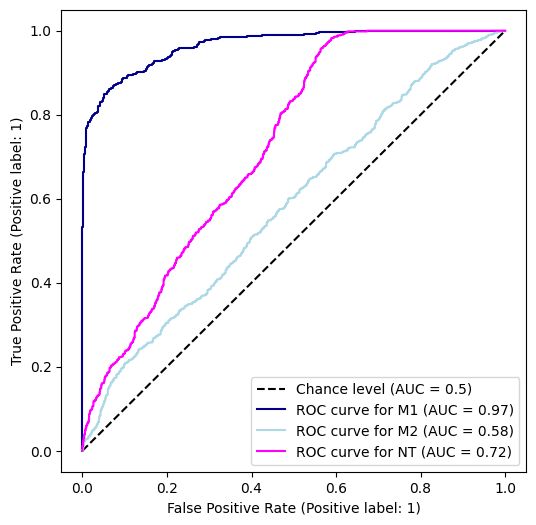

In [30]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)